<a href="https://colab.research.google.com/github/abhinav4201/Data-Analysis-EDA/blob/main/Uptitude_Technical_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='#FF3206'>**Project Name**    - <font color='#3792cb'>Exploratory Data Analysis



##Imports

In [185]:
#essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
#importing data 
brand_df = pd.read_csv('/content/drive/MyDrive/Technical Test Uptitude/Brand-Platform-URL.csv')
twitter_df = pd.read_csv('/content/drive/MyDrive/Technical Test Uptitude/Twitter Data.csv')
yt_data_df = pd.read_csv('/content/drive/MyDrive/Technical Test Uptitude/Youtube Channel Data.csv')
yt_view_df = pd.read_csv('/content/drive/MyDrive/Technical Test Uptitude/Youtube Views.csv')

In [188]:
#brand platform dataset
brand_df.sample(5)

,Brand,Market,Platform,URL
153,techfond,Russian Federation,Twitter,twitter.com/dor_jp
360,dualjape,United States of America,YouTube,youtube.com/channel/UCDOEC8hUK2xvA7Oan-0kWMB1
238,weiwind,Hungary,YouTube,youtube.com/channel/UCsruvTW571AObCSiIYmmoHe6
162,aquapeak,"Taiwan, Province of China",YouTube,youtube.com/channel/UCBcwtYqse4Yb13bI4k4e4xw
139,techfond,Mexico,Twitter,twitter.com/ksgAxe


In [189]:
#twitter data set
twitter_df.sample(5)

,URL,Verified,Verified Accounts,Year,Quarter,Month,Day,Name / ID,Location,Has Description,Followers,Status Available,Accounts Without a Link
426,twitter.com/dor_jp,False,Non Verified Accounts,2021,Qtr 4,December,31,Efecto Axe Ecuador,NaN,Has Description,953.0,True,Has Link
478,twitter.com/yZAeru,False,Non Verified Accounts,2022,Qtr 1,January,31,LifebuoyZA,NaN,Has Description,2347.0,True,No Link
247,twitter.com/inabia,True,Verified Accounts,2021,Qtr 4,December,31,axeargentina,Argentina,Has Description,19369.0,True,Has Link
113,twitter.com/ananPy,False,Non Verified Accounts,2021,Qtr 1,March,9,NaN,Ghana,Has Description,2837.0,True,Has Link
19,twitter.com/uayela,False,Non Verified Accounts,2021,Qtr 1,March,9,NaN,NaN,Has Description,6054.0,True,Has Link


In [190]:
#youtube data set
yt_data_df.sample(5)

,URL,Channel Has Title,Has Description,Location,Year,Quarter,Month,Day,Is Verified,Subscriber
1005,youtube.com/channel/UC5uoI10oV5ca2CJ1loouD5A7,Has Title,Has Description,TW,2021,Qtr 3,July,29,NaN,3980.0
490,youtube.com/channel/UCoHEisDCy8-hRS-XxSHXkhe3,Has Title,No Description,NaN,2022,Qtr 2,May,21,False,286.0
370,youtube.com/channel/UCS9A_mwq-752XIIEKfqDfZS6,Has Title,Has Description,Italy,2022,Qtr 1,January,28,False,839.0
593,youtube.com/channel/UClTAHqOtW0f5FJOY0QtQ4bG2,Has Title,Has Description,NaN,2021,Qtr 4,December,30,False,75.0
700,youtube.com/channel/UChzj7Me7l3gWtC1HRMsacnT1,Has Title,No Description,NaN,2021,Qtr 3,July,29,NaN,22.0


In [191]:
#youtube views data set
yt_view_df.sample(5)

,Channel URL,Video URL,Views,Year,Quarter,Month,Day
4020,youtube.com/channel/UCBcYa34qB4j3qwNn9NgjlOp3,youtube.com/watch?v=aicnQ3A48,4214,2021,Qtr 1,March,10
19663,youtube.com/channel/UCTsKLnLr81d9BZYOKyC6lx24,youtube.com/watch?v=iwo4c6LVw,1997,2021,Qtr 1,March,10
11527,youtube.com/channel/UCZx8QzfK-3OQfTR2u_1PeVj1,youtube.com/watch?v=8QE-43E4w,22,2021,Qtr 1,March,10
13119,youtube.com/channel/UCca7vdppZ8sfxHfFTDOBcDr3,youtube.com/watch?v=lM1Ru869Y,1681926,2021,Qtr 1,March,10
821,youtube.com/channel/UCcjkzAcwG7T-oECUt4XpJvS2,youtube.com/watch?v=Ny-uD9kPQ,751,2021,Qtr 1,March,10


In [192]:
# Dataset Rows(Observation) & Columns count(Feature)
for val, df in [('Brand', brand_df), ('Twitter',twitter_df), ('YouTube Data',yt_data_df), ('YouTube View',yt_view_df)]:
  print(f'Total observation {df.shape[0]} and feature for {val} dataset: {df.shape[1]}')

Total observation 422 and feature for Brand dataset: 4
Total observation 629 and feature for Twitter dataset: 13
Total observation 1110 and feature for YouTube Data dataset: 10
Total observation 20315 and feature for YouTube View dataset: 7


In [193]:
# Dataset Info
for val, df in [('Brand', brand_df), ('Twitter',twitter_df), ('YouTube Data',yt_data_df), ('YouTube View',yt_view_df)]:
  print(val, 'Info')
  print('\n')
  print(df.info())
  print('='*120)
  print('\n')

Brand Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     422 non-null    object
 1   Market    422 non-null    object
 2   Platform  422 non-null    object
 3   URL       422 non-null    object
dtypes: object(4)
memory usage: 13.3+ KB
None


Twitter Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   URL                      629 non-null    object 
 1   Verified                 607 non-null    object 
 2   Verified Accounts        607 non-null    object 
 3   Year                     629 non-null    int64  
 4   Quarter                  629 non-null    object 
 5   Month                    629 non-null    object 
 6   Day                      629 non-null    int64  
 

In [194]:

# Dataset Duplicate Value Count
for val, df in [('Brand', brand_df), ('Twitter',twitter_df), ('YouTube Data',yt_data_df), ('YouTube View',yt_view_df)]:
  print(f'For {val} Data')
  print('\n')
  print(f"Data is duplicated ? {df.duplicated().value_counts()},unique values with {len(df[df.duplicated()])} duplication")
  print('\n')
  print('='*120)
  print('\n')

For Brand Data


Data is duplicated ? False    422
dtype: int64,unique values with 0 duplication




For Twitter Data


Data is duplicated ? False    629
dtype: int64,unique values with 0 duplication




For YouTube Data Data


Data is duplicated ? False    1110
dtype: int64,unique values with 0 duplication




For YouTube View Data


Data is duplicated ? False    20315
dtype: int64,unique values with 0 duplication






In [195]:
# Missing Values/Null Values Count for brand data
brand_df.isnull().sum()

Brand       0
Market      0
Platform    0
URL         0
dtype: int64

In [196]:
# Missing Values/Null Values Count for twitter data
twitter_df.isnull().sum()

URL                          0
Verified                    22
Verified Accounts           22
Year                         0
Quarter                      0
Month                        0
Day                          0
Name / ID                  144
Location                   340
Has Description              0
Followers                   22
Status Available            22
Accounts Without a Link      0
dtype: int64

In [197]:
# Missing Values/Null Values Count for youtube data
yt_data_df.isnull().sum()

URL                    0
Channel Has Title      0
Has Description        0
Location             669
Year                   0
Quarter                0
Month                  0
Day                    0
Is Verified          329
Subscriber             7
dtype: int64

In [198]:
# Missing Values/Null Values Count for youtube views data
yt_view_df.isnull().sum()

Channel URL    0
Video URL      0
Views          0
Year           0
Quarter        0
Month          0
Day            0
dtype: int64

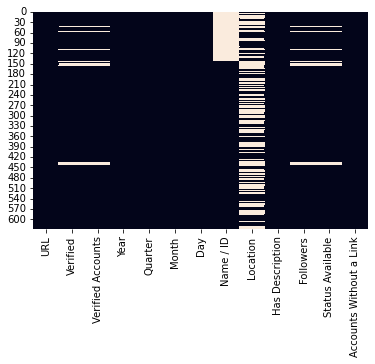

In [199]:
# Checking Null Value by plotting Heatmap
sns.heatmap(twitter_df.isnull(), cbar=False);

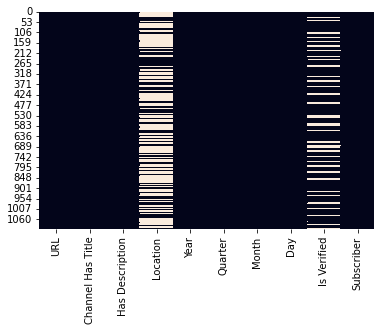

In [200]:
# Checking Null Value by plotting Heatmap
sns.heatmap(yt_data_df.isnull(), cbar=False);

In [201]:
# Missing Value Count Function
def showMissing(df):
    missing = df.columns[df.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = yt_data_df[showMissing(yt_data_df)].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = yt_data_df[showMissing(yt_data_df)].isnull().sum().sort_values(ascending = False)/len(yt_data_df)*100

missingVal

,Missing Data Count,Missing Data Percentage
Location,669,60.270270
Is Verified,329,29.639640
Subscriber,7,0.630631


In [202]:
missingVal2 = pd.DataFrame()
missingVal2['Missing Data Count'] = twitter_df[showMissing(twitter_df)].isnull().sum().sort_values(ascending = False)
missingVal2['Missing Data Percentage'] = twitter_df[showMissing(twitter_df)].isnull().sum().sort_values(ascending = False)/len(twitter_df)*100

missingVal2

,Missing Data Count,Missing Data Percentage
Location,340,54.054054
Name / ID,144,22.893482
Verified,22,3.497615
Verified Accounts,22,3.497615
Followers,22,3.497615
Status Available,22,3.497615


Based on the above observation we can conclude that:

* All data are unique and show no duplication. 
* Total observation 422 and feature for Brand dataset: 4
* Total observation 629 and feature for Twitter dataset: 13 with 54% of missing value in feature location, other features which had missing values are name/id, verified, verified accounts, followers, status available.
* Total observation 1110 and feature for YouTube Data dataset: 10 and show more than 50% missing value in location feature and other feature which had missing values are is verified and subscriber.
* Total observation 20315 and feature for YouTube View dataset: 7

##Data Wrangling

In [203]:
#merging twitter df with brand df to get brand name for each twitter url
tweet_df = brand_df.merge(twitter_df, on = 'URL', how = 'inner')
tweet_df.sample(5)

,Brand,Market,Platform,URL,Verified,Verified Accounts,Year,Quarter,Month,Day,Name / ID,Location,Has Description,Followers,Status Available,Accounts Without a Link
509,dualjape,India,Twitter,twitter.com/inaluy,False,Non Verified Accounts,2022,Qtr 1,January,31,Sedal Argentina,Argentina,Has Description,43970.0,True,Has Link
501,handfoxy,Hong Kong,Twitter,twitter.com/nPYuay,False,Non Verified Accounts,2022,Qtr 1,January,31,Rexona Women PY,Paraguay,Has Description,866.0,True,Has Link
553,dualjape,Malaysia,Twitter,twitter.com/kPHure,True,Verified Accounts,2022,Qtr 1,January,31,Sunsilk PH,"Manila, Philippines",Has Description,16824.0,True,Has Link
429,aquapeak,Bangladesh,Twitter,twitter.com/biaaea,True,Verified Accounts,2022,Qtr 1,January,31,Rexona Arabia,NaN,Has Description,23808.0,True,No Link
460,techfond,Colombia,Twitter,twitter.com/necang,NaN,NaN,2022,Qtr 1,January,31,"('Connection aborted.', HTTPException('got mor...",NaN,No Description,NaN,NaN,No Link


In [204]:
#function to extract user id form url
def get_user_id(link):
  link_elements = link.split("/")
  return link_elements[1]

In [205]:
tweet_df['User_Id'] = tweet_df['URL'].apply(get_user_id)
tweet_df.sample(5)

,Brand,Market,Platform,URL,Verified,Verified Accounts,Year,Quarter,Month,Day,Name / ID,Location,Has Description,Followers,Status Available,Accounts Without a Link,User_Id
214,dualjape,United Kingdom of Great Britain and Northern I...,Twitter,twitter.com/_thina,True,Verified Accounts,2021,Qtr 1,March,9,NaN,Thailand,Has Description,119.0,True,Has Link,_thina
30,songseem,"Bolivia, Plurinational State of",Twitter,twitter.com/lubada,False,Non Verified Accounts,2022,Qtr 1,January,31,Axe Angels,NaN,Has Description,2766.0,True,No Link,lubada
126,handfoxy,Netherlands,Twitter,twitter.com/eJPiye,True,Verified Accounts,2022,Qtr 1,January,31,CLEAR(クリア)公式,NaN,Has Description,3832.0,True,Has Link,eJPiye
145,germanrosy,Peru,Twitter,twitter.com/nTRove,False,Non Verified Accounts,2021,Qtr 4,December,31,Clear Women,NaN,Has Description,2847.0,True,Has Link,nTRove
448,carslord,Canada,Twitter,twitter.com/espnfr,True,Verified Accounts,2021,Qtr 4,December,31,Rexona España,NaN,Has Description,6455.0,True,Has Link,espnfr


In [206]:
#shape for new df tweet df
tweet_df.shape

(629, 17)

In [207]:
yt_view_df.columns

Index(['Channel URL', 'Video URL', 'Views', 'Year', 'Quarter', 'Month', 'Day'], dtype='object')

In [208]:
#renaming columns in youtube view dataset for merging
yt_views_df = yt_view_df.rename(columns = {'Channel URL' : 'URL',
                                           'Year':'Video_Year',
                                           'Quarter':'Video_Quarter',
                                           'Month':'Video_Month',
                                           'Day':'Video_Day'})
yt_views_df.sample(5)

,URL,Video URL,Views,Video_Year,Video_Quarter,Video_Month,Video_Day
4251,youtube.com/channel/UCnMCAmZHR5PIgjeUtorQfIL2,youtube.com/watch?v=3AWNo2NhQ,664,2021,Qtr 1,March,10
11500,youtube.com/channel/UCPUPqz1oJ3px5O0mvBMvjDD8,youtube.com/watch?v=188b68kJc,491720,2021,Qtr 1,March,10
4966,youtube.com/channel/UCGKdUwgrS86pDNxqBABJAd_6,youtube.com/watch?v=_ifDW4sDU,3846,2021,Qtr 1,March,10
10018,youtube.com/channel/UC_KpTo38S7I2SwQgm1aqaQm2,youtube.com/watch?v=QEWUD404o,1817,2021,Qtr 1,March,10
7544,youtube.com/channel/UCgrpPtiIr2fZcrVbaw6R_aY0,youtube.com/watch?v=Av6cT29cs,4676,2021,Qtr 1,March,10


In [209]:
set(yt_data_df['URL'].unique().tolist()).difference(set(yt_views_df['URL'].unique().tolist()))

{'youtube.com/channel/UC2f6wfMgUdL20cSrh4L2XoA',
 'youtube.com/channel/UCBB9ERt12sMjacsvqvJiyRQ',
 'youtube.com/channel/UCBcwtYqse4Yb13bI4k4e4xw',
 'youtube.com/channel/UCKLyo3uAEM4aNTYkHoBGTOw',
 'youtube.com/channel/UCNgav6lMQF1zFco9_W_GkoQ',
 'youtube.com/channel/UCPf9LqzE9yjlIuYWxUww2KQ',
 'youtube.com/channel/UCcQgYUSp3PORuZIQBsXdk4A',
 'youtube.com/channel/UCl4P5q7rLTmH6bjFeQGrrMg',
 'youtube.com/channel/UCsq4MGhZrAS0oFgWxgLjdXg'}

In [210]:
#merging youtube data all together
yt_df = brand_df.merge(yt_data_df, on= 'URL', how ='inner').merge(
    yt_views_df, on = 'URL', how ='inner')
yt_df.sample(5)

,Brand,Market,Platform,URL,Channel Has Title,Has Description,Location,Year,Quarter,Month,Day,Is Verified,Subscriber,Video URL,Views,Video_Year,Video_Quarter,Video_Month,Video_Day
59089,dualjape,South Africa,YouTube,youtube.com/channel/UCcKRmvr8B7mjGONzXqSdvgc4,Has Title,Has Description,NaN,2021,Qtr 4,December,30,False,788000.0,youtube.com/watch?v=SZERC3IVM,17203,2021,Qtr 1,March,10
26434,aquapeak,Romania,YouTube,youtube.com/channel/UCrS31IRlA5XciGI3gBj72P47,Has Title,Has Description,NaN,2021,Qtr 4,December,30,False,1980.0,youtube.com/watch?v=qLtvS69D0,650107,2021,Qtr 1,March,10
45120,bassvest,Fiji,YouTube,youtube.com/channel/UCL6LibNWY1KNp1tbVKTucD30,Has Title,Has Description,NaN,2022,Qtr 1,January,28,False,41100.0,youtube.com/watch?v=5d0cu5le8,1346,2021,Qtr 1,March,10
30784,techfond,Uruguay,YouTube,youtube.com/channel/UCQOglvUpM3KQPfH0T2SkEej2,Has Title,Has Description,NaN,2021,Qtr 4,December,30,False,33000.0,youtube.com/watch?v=SSpeI5eFg,5193,2021,Qtr 1,March,10
79195,handfoxy,Ecuador,YouTube,youtube.com/channel/UC0uGC_EBw3Axw3ljqeGjy2q3,Has Title,Has Description,US,2021,Qtr 3,July,29,NaN,148000.0,youtube.com/watch?v=aZnXT2NpM,421040,2021,Qtr 1,March,10


In [211]:
#final df for twitter dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    629 non-null    object 
 1   Market                   629 non-null    object 
 2   Platform                 629 non-null    object 
 3   URL                      629 non-null    object 
 4   Verified                 607 non-null    object 
 5   Verified Accounts        607 non-null    object 
 6   Year                     629 non-null    int64  
 7   Quarter                  629 non-null    object 
 8   Month                    629 non-null    object 
 9   Day                      629 non-null    int64  
 10  Name / ID                485 non-null    object 
 11  Location                 289 non-null    object 
 12  Has Description          629 non-null    object 
 13  Followers                607 non-null    float64
 14  Status Available         6

In [212]:
#final df for youtube dataset
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81642 entries, 0 to 81641
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              81642 non-null  object 
 1   Market             81642 non-null  object 
 2   Platform           81642 non-null  object 
 3   URL                81642 non-null  object 
 4   Channel Has Title  81642 non-null  object 
 5   Has Description    81642 non-null  object 
 6   Location           39703 non-null  object 
 7   Year               81642 non-null  int64  
 8   Quarter            81642 non-null  object 
 9   Month              81642 non-null  object 
 10  Day                81642 non-null  int64  
 11  Is Verified        60375 non-null  object 
 12  Subscriber         81356 non-null  float64
 13  Video URL          81642 non-null  object 
 14  Views              81642 non-null  int64  
 15  Video_Year         81642 non-null  int64  
 16  Video_Quarter      816

In [213]:
#checking for duplicates as value increased after merging
duplicates = yt_df[yt_df.duplicated()]

print(len(duplicates))

0




---
Dealing with null values
* ignoring location columns as it has more than 50% of null values
* treating other null values using mode since it has categorial data and for numerical value will check for distribution before choosing mean, median or mode.

In [214]:
# Check Unique Values for each variable.
for i in tweet_df.columns.tolist():
  print(f"No. of unique values in {i} is {tweet_df[i].nunique()}.")

No. of unique values in Brand is 12.
No. of unique values in Market is 77.
No. of unique values in Platform is 1.
No. of unique values in URL is 160.
No. of unique values in Verified is 2.
No. of unique values in Verified Accounts is 2.
No. of unique values in Year is 2.
No. of unique values in Quarter is 3.
No. of unique values in Month is 4.
No. of unique values in Day is 2.
No. of unique values in Name / ID is 155.
No. of unique values in Location is 45.
No. of unique values in Has Description is 2.
No. of unique values in Followers is 497.
No. of unique values in Status Available is 2.
No. of unique values in Accounts Without a Link is 2.
No. of unique values in User_Id is 160.


In [215]:
# Check Unique Values for each variable.
for i in yt_df.columns.tolist():
  print(f"No. of unique values in {i} is {yt_df[i].nunique()}.")

No. of unique values in Brand is 12.
No. of unique values in Market is 85.
No. of unique values in Platform is 1.
No. of unique values in URL is 253.
No. of unique values in Channel Has Title is 2.
No. of unique values in Has Description is 2.
No. of unique values in Location is 98.
No. of unique values in Year is 2.
No. of unique values in Quarter is 4.
No. of unique values in Month is 5.
No. of unique values in Day is 5.
No. of unique values in Is Verified is 2.
No. of unique values in Subscriber is 652.
No. of unique values in Video URL is 20315.
No. of unique values in Views is 13167.
No. of unique values in Video_Year is 1.
No. of unique values in Video_Quarter is 1.
No. of unique values in Video_Month is 1.
No. of unique values in Video_Day is 1.


In [216]:
#dropping location other columns which might not be much useful for analysis because of not showing variation
twt_df = tweet_df.drop(columns =['Location','Platform','URL','Verified'], axis = 1)
twt_df.sample(2)

,Brand,Market,Verified Accounts,Year,Quarter,Month,Day,Name / ID,Has Description,Followers,Status Available,Accounts Without a Link,User_Id
512,aquapeak,Indonesia,Non Verified Accounts,2021,Qtr 4,December,31,Sedal Bolivia,No Description,44.0,True,No Link,via_ZA
624,bassvest,South Africa,Non Verified Accounts,2022,Qtr 2,May,9,michele khan,No Description,8.0,False,No Link,ile


In [217]:
yutb_df = yt_df.drop(columns =['Location','Platform','Video_Year','Video_Quarter','Video_Month','Video_Day'], axis = 1)
yutb_df.sample(2)

,Brand,Market,URL,Channel Has Title,Has Description,Year,Quarter,Month,Day,Is Verified,Subscriber,Video URL,Views
54617,dualjape,United States of America,youtube.com/channel/UCF1pLZIvb7SCOvWpiphJzbv6,Has Title,Has Description,2022,Qtr 1,January,28,False,4040.0,youtube.com/watch?v=b4P6X2J08,245592
27889,dualjape,Spain,youtube.com/channel/UCrE-1bjkm5DD20DiQcBZyri3,Has Title,Has Description,2022,Qtr 1,January,28,False,47100.0,youtube.com/watch?v=Gwboy3AUM,2009918


Twitter Data null value treatment

---



In [218]:
twt_df[twt_df['Name / ID'].isnull()]

,Brand,Market,Verified Accounts,Year,Quarter,Month,Day,Name / ID,Has Description,Followers,Status Available,Accounts Without a Link,User_Id
0,germanrosy,United States of America,Non Verified Accounts,2021,Qtr 1,March,9,NaN,Has Description,113.0,True,Has Link,_gr_SA
4,carslord,India,Non Verified Accounts,2021,Qtr 1,March,9,NaN,Has Description,10.0,True,Has Link,_idand
8,vandawn,Argentina,Verified Accounts,2021,Qtr 1,March,9,NaN,Has Description,31393.0,True,Has Link,_nluay
12,aquapeak,Austria,Verified Accounts,2021,Qtr 1,March,9,NaN,Has Description,1326.0,True,Has Link,elllub
16,dualjape,Azerbaijan,Verified Accounts,2021,Qtr 1,March,9,NaN,Has Description,21731.0,True,Has Link,_SAina
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,handfoxy,Malta,Non Verified Accounts,2021,Qtr 1,March,9,NaN,Has Description,256.0,True,Has Link,kPKeuk
559,techfond,Mexico,Non Verified Accounts,2021,Qtr 1,March,9,NaN,Has Description,3.0,False,No Link,ksgAxe
563,dualjape,Morocco,Non Verified Accounts,2021,Qtr 1,March,9,NaN,Has Description,419.0,True,Has Link,and_be
567,handfoxy,Netherlands,Verified Accounts,2021,Qtr 1,March,9,NaN,Has Description,21573.0,True,Has Link,urevia


In [219]:
#function to replace null value with mode based on unique identity
def replace_null(df, checking_col , unique_col ):
  '''
  function to replace null value with mode based on unique identity
  '''
  for val in df[unique_col].unique().tolist():
      rdf = df[df[unique_col] == val]
      mode = rdf[checking_col].mode()
      if mode.empty:
        continue
      mode = mode[0]
      df.loc[df[unique_col] == val, checking_col] = df.loc[df[unique_col] == val, checking_col].fillna(mode)

In [220]:
#replacing nan for name / id where user id is same
for col in ['Name / ID', 'Verified Accounts', 'Followers', 'Status Available']:
  replace_null(twt_df, col , 'User_Id')

In [221]:
#getting only null value data
twt_df.isnull().sum()[twt_df.isnull().any()]

Verified Accounts    8
Followers            8
Status Available     8
dtype: int64

In [222]:
#checking for remaining null values
twt_df[twt_df['Verified Accounts'].isnull()]

,Brand,Market,Verified Accounts,Year,Quarter,Month,Day,Name / ID,Has Description,Followers,Status Available,Accounts Without a Link,User_Id
230,bassvest,Thailand,NaN,2021,Qtr 1,March,9,"[{'code': 63, 'message': 'User has been suspen...",Has Description,NaN,NaN,No Link,inaece
231,bassvest,Thailand,NaN,2021,Qtr 4,December,31,"[{'code': 63, 'message': 'User has been suspen...",No Description,NaN,NaN,No Link,inaece
232,bassvest,Thailand,NaN,2022,Qtr 1,January,31,"[{'code': 63, 'message': 'User has been suspen...",No Description,NaN,NaN,No Link,inaece
233,bassvest,Thailand,NaN,2022,Qtr 2,May,9,"[{'code': 63, 'message': 'User has been suspen...",No Description,NaN,NaN,No Link,inaece
571,dualjape,New Zealand,NaN,2021,Qtr 1,March,9,"[{'code': 63, 'message': 'User has been suspen...",Has Description,NaN,NaN,No Link,eukile
572,dualjape,New Zealand,NaN,2021,Qtr 4,December,31,"[{'code': 63, 'message': 'User has been suspen...",No Description,NaN,NaN,No Link,eukile
573,dualjape,New Zealand,NaN,2022,Qtr 1,January,31,"[{'code': 63, 'message': 'User has been suspen...",No Description,NaN,NaN,No Link,eukile
574,dualjape,New Zealand,NaN,2022,Qtr 2,May,9,"[{'code': 63, 'message': 'User has been suspen...",No Description,NaN,NaN,No Link,eukile


In [223]:
#since these data are for suspended account hence replacing values verified as no, followers as 0 and status as false
twt_df['Verified Accounts'].fillna('Non Verified Accounts', inplace = True)
twt_df['Followers'].fillna(0, inplace =True)
twt_df['Status Available'].fillna('False', inplace = True)

In [224]:
twt_df.isnull().sum()[twt_df.isnull().any()]

Series([], dtype: int64)

YouTube Data Null value treatment 

---



In [225]:
yutb_df.isnull().sum()[yutb_df.isnull().any()]

Is Verified    21267
Subscriber       286
dtype: int64

In [226]:
#replacing null value with mode based on unique column URL
replace_null(yutb_df, 'Is Verified', 'URL')
replace_null(yutb_df, 'Subscriber', 'URL')

In [227]:
yutb_df.isnull().sum()[yutb_df.isnull().any()]

Series([], dtype: int64)

##EDA

##Conclusions